In [18]:
#Importing datasets
import pandas as pd
import numpy as np
from fbprophet import Prophet
#Read train and test
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')


#Convert to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train['hour'] = train.Datetime.dt.hour

In [19]:
# Calculate average hourly fraction
hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
hourly_frac.drop(['ID'], axis = 1, inplace = True)
hourly_frac.columns = ['fraction']


# convert to time series from dataframe
train.index = train.Datetime
train.drop(['ID','hour','Datetime'], axis = 1, inplace = True)


daily_train = train.resample('D').sum()

In [20]:
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
2012-08-30,74
2012-08-31,78
2012-09-01,112
2012-09-02,118


In [21]:
# prophet requires the exact column name for dataframe
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)
# daily_train

In [26]:
# fit the prophet model 
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


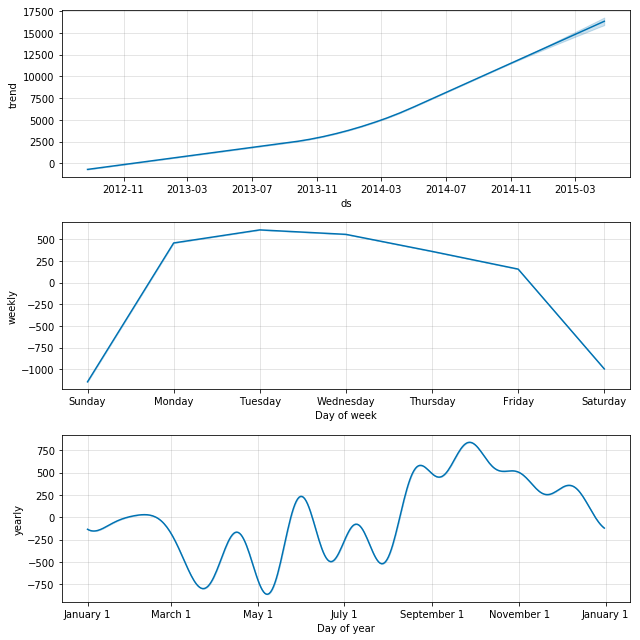

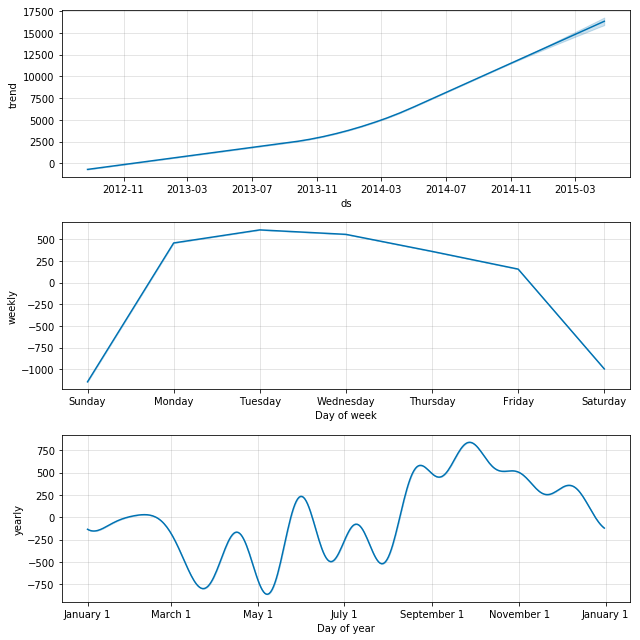

In [36]:
# view the result of each component
m.plot_components(forecast)